##**Importing all requisite libraries:-**

In [ ]:
!pip install catboost
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import numpy as np
from keras.layers import Input, Dense, Dropout
from keras.models import Model
import random
import scipy.stats
import os
import tensorflow as tf
import tensorflow as tf
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import mean_squared_error as mse
from catboost import CatBoostRegressor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.3 MB/s 


## **Loading of data into the DataFrame:-**

In [ ]:
train=pd.read_csv(r"train_IxoE5JN.csv")
train.head()

row_id             datetime       energy
0       1  2008-03-01 00:00:00  1259.985563
1       2  2008-03-01 01:00:00  1095.541500
2       3  2008-03-01 02:00:00  1056.247500
3       4  2008-03-01 03:00:00  1034.742000
4       5  2008-03-01 04:00:00  1026.334500

## **Splitting of datetime into seperate columns:-**

In [ ]:
test = pd.read_csv(r"test_WudNWDM.csv",parse_dates=['datetime'])
test['year'] = test['datetime'].dt.year
test['month'] =test['datetime'].dt.month
test['day'] =test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour



In [ ]:
test.head()

row_id            datetime  year  month  day  hour
0   94993 2019-01-01 00:00:00  2019      1    1     0
1   94994 2019-01-01 01:00:00  2019      1    1     1
2   94995 2019-01-01 02:00:00  2019      1    1     2
3   94996 2019-01-01 03:00:00  2019      1    1     3
4   94997 2019-01-01 04:00:00  2019      1    1     4

In [ ]:
test.isna().sum()

row_id      0
datetime    0
year        0
month       0
day         0
hour        0
dtype: int64

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26304 entries, 0 to 26303
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   row_id    26304 non-null  int64         
 1   datetime  26304 non-null  datetime64[ns]
 2   year      26304 non-null  int64         
 3   month     26304 non-null  int64         
 4   day       26304 non-null  int64         
 5   hour      26304 non-null  int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 1.2 MB


In [ ]:
train = pd.read_csv(r"train_IxoE5JN.csv",parse_dates=['datetime'])
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour



In [ ]:
train.head()

row_id            datetime       energy  year  month  day  hour
0       1 2008-03-01 00:00:00  1259.985563  2008      3    1     0
1       2 2008-03-01 01:00:00  1095.541500  2008      3    1     1
2       3 2008-03-01 02:00:00  1056.247500  2008      3    1     2
3       4 2008-03-01 03:00:00  1034.742000  2008      3    1     3
4       5 2008-03-01 04:00:00  1026.334500  2008      3    1     4

In [ ]:
train.describe()

row_id        energy          year         month           day  \
count  94992.000000  93092.000000  94992.000000  94992.000000  94992.000000   
mean   47496.500000   1702.995014   2013.075038      6.599040     15.733704   
std    27421.972723    369.322103      3.125436      3.417591      8.802197   
min        1.000000    866.388600   2008.000000      1.000000      1.000000   
25%    23748.750000   1431.541100   2010.000000      4.000000      8.000000   
50%    47496.500000   1654.465800   2013.000000      7.000000     16.000000   
75%    71244.250000   1935.993450   2016.000000     10.000000     23.000000   
max    94992.000000   3374.399600   2018.000000     12.000000     31.000000   

               hour  
count  94992.000000  
mean      11.500000  
std        6.922223  
min        0.000000  
25%        5.750000  
50%       11.500000  
75%       17.250000  
max       23.000000

## **Data Cleaning:-**

In [ ]:
train.isna().sum()

row_id         0
datetime       0
energy      1900
year           0
month          0
day            0
hour           0
dtype: int64

In [ ]:
df=train.copy()

In [ ]:
df=df.drop(['datetime'], axis=1)

## **Arranging in proper sequnence i.e. target column at last:**-

In [ ]:
df1=df.iloc[:,0:1]
df2=df.iloc[:,2:6]
df3=df.iloc[:,1:2]
res=pd.concat([df1,df2,df3], axis=1)

In [ ]:
res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94992 entries, 0 to 94991
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   row_id  94992 non-null  int64  
 1   year    94992 non-null  int64  
 2   month   94992 non-null  int64  
 3   day     94992 non-null  int64  
 4   hour    94992 non-null  int64  
 5   energy  93092 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 4.3 MB


In [ ]:
res.isna().sum()

row_id       0
year         0
month        0
day          0
hour         0
energy    1900
dtype: int64

In [ ]:
# Imputing with MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor

df_mice =  train.filter(['row_id','year','month','day','hour','energy'], axis=1).copy()


# Define MICE Imputer and fill missing values
mice_imputer = IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=5), n_nearest_features=None,max_iter=100, tol=0.001,initial_strategy='mean', imputation_order='ascending')

df_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(df_mice), columns=df_mice.columns)

In [ ]:
df_mice_imputed

row_id    year  month   day  hour       energy
0          1.0  2008.0    3.0   1.0   0.0  1259.985563
1          2.0  2008.0    3.0   1.0   1.0  1095.541500
2          3.0  2008.0    3.0   1.0   2.0  1056.247500
3          4.0  2008.0    3.0   1.0   3.0  1034.742000
4          5.0  2008.0    3.0   1.0   4.0  1026.334500
...        ...     ...    ...   ...   ...          ...
94987  94988.0  2018.0   12.0  31.0  19.0  2528.446800
94988  94989.0  2018.0   12.0  31.0  20.0  2461.883600
94989  94990.0  2018.0   12.0  31.0  21.0  2365.994400
94990  94991.0  2018.0   12.0  31.0  22.0  2342.942800
94991  94992.0  2018.0   12.0  31.0  23.0  2180.217600

[94992 rows x 6 columns]

In [ ]:
df_mice_imputed['year'] = df_mice_imputed['year'].astype(int)
df_mice_imputed['month'] = df_mice_imputed['month'].astype(int)
df_mice_imputed['day'] = df_mice_imputed['day'].astype(int)
df_mice_imputed['hour'] = df_mice_imputed['hour'].astype(int)
df_mice_imputed['row_id'] = df_mice_imputed['row_id'].astype(int)

In [ ]:
#res1=df_mice_imputed.drop(['row_id'],axis=1)

In [ ]:
#res1

In [ ]:
res=df_mice_imputed.copy()

In [ ]:
res

row_id  year  month  day  hour       energy
0           1  2008      3    1     0  1259.985563
1           2  2008      3    1     1  1095.541500
2           3  2008      3    1     2  1056.247500
3           4  2008      3    1     3  1034.742000
4           5  2008      3    1     4  1026.334500
...       ...   ...    ...  ...   ...          ...
94987   94988  2018     12   31    19  2528.446800
94988   94989  2018     12   31    20  2461.883600
94989   94990  2018     12   31    21  2365.994400
94990   94991  2018     12   31    22  2342.942800
94991   94992  2018     12   31    23  2180.217600

[94992 rows x 6 columns]

In [ ]:
#res1.isna().sum()

In [ ]:
res.isna().sum()

row_id    0
year      0
month     0
day       0
hour      0
energy    0
dtype: int64

In [ ]:
# Imputing with KNNImputer

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler



# Define scaler to set values between 0 and 1

df_knn = train.filter(['year','month','day','hour','energy'], axis=1).copy()

# Define scaler to set values between 0 and 1

scaler = MinMaxScaler(feature_range=(0, 1))
df_knn = pd.DataFrame(scaler.fit_transform(df_knn), columns = df_knn.columns)

# Define KNN imputer and fill missing values
knn_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df_knn), columns=df_knn.columns)

In [ ]:
df_knn_imputed

year     month  day      hour    energy
0       0.0  0.181818  0.0  0.000000  0.156936
1       0.0  0.181818  0.0  0.043478  0.091368
2       0.0  0.181818  0.0  0.086957  0.075701
3       0.0  0.181818  0.0  0.130435  0.067126
4       0.0  0.181818  0.0  0.173913  0.063774
...     ...       ...  ...       ...       ...
94987   1.0  1.000000  1.0  0.826087  0.662700
94988   1.0  1.000000  1.0  0.869565  0.636159
94989   1.0  1.000000  1.0  0.913043  0.597926
94990   1.0  1.000000  1.0  0.956522  0.588735
94991   1.0  1.000000  1.0  1.000000  0.523853

[94992 rows x 5 columns]

## **Train-Test Split:-**

In [ ]:
#X = res1.drop(['energy'], axis=1)
#y = res1['energy']

In [ ]:
X = res.drop(['energy'], axis=1)
y = res['energy']

In [ ]:
#X = df_knn_imputed.drop(['energy'], axis=1)
#y = df_knn_imputed['energy']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=2022, test_size=0.2)


In [ ]:
X_train.shape,X_val.shape,y_train.shape,y_val.shape

((75993, 5), (18999, 5), (75993,), (18999,))

##**Standardizing the samples:**-

In [ ]:
    preproc = StandardScaler()
    X_tr_f = preproc.fit_transform(X_train)
    X_va_f = preproc.transform(X_val)

# **Different Machine Learning Models:**-

# **1. Linear Regression:**-

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
print("Test R^2 Score: {:.5f}".format(model.score(X_val, y_val)))

Test R^2 Score: 0.49414


In [ ]:
model = LinearRegression()
model.fit(X_tr_f , y_train)
print("Test R^2 Score: {:.5f}".format(model.score(X_va_f, y_val)))

Test R^2 Score: 0.49414


# **2. Random Forest:**-

In [ ]:
regr = RandomForestRegressor(n_estimators = 10, max_depth = 4, random_state = 101)
regr.fit(X_train, y_train.values.ravel())

RandomForestRegressor(max_depth=4, n_estimators=10, random_state=101)

In [ ]:
predictions = regr.predict(X_val)


In [ ]:
mae = mean_absolute_error(y_val.values.ravel(), predictions)

# Mean squared error (MSE)
mse = mean_squared_error(y_val.values.ravel(), predictions)

# R-squared scores
r2 = r2_score(y_val.values.ravel(), predictions)

# Print metrics
print('Mean Absolute Error:', round(mae, 2))
print('Mean Squared Error:', round(mse, 2))
print('R-squared scores:', round(r2, 2))

Mean Absolute Error: 174.53
Mean Squared Error: 50481.28
R-squared scores: 0.63


# **3. CatBoost:**-

In [ ]:
model2=CatBoostRegressor()
model2.fit(X_train, y_train)
print("Test R^2 Score: {:.5f}".format(model2.score(X_val, y_val)))


Learning rate set to 0.08116
0:	learn: 350.6475086	total: 58.7ms	remaining: 58.6s
1:	learn: 333.7372595	total: 69.7ms	remaining: 34.8s
2:	learn: 318.9424561	total: 80.3ms	remaining: 26.7s
3:	learn: 306.5278105	total: 90.4ms	remaining: 22.5s
4:	learn: 294.0088846	total: 101ms	remaining: 20.2s
5:	learn: 282.7117027	total: 112ms	remaining: 18.5s
6:	learn: 272.8672591	total: 122ms	remaining: 17.3s
7:	learn: 263.7874794	total: 132ms	remaining: 16.4s
8:	learn: 255.8934941	total: 142ms	remaining: 15.6s
9:	learn: 248.9225884	total: 155ms	remaining: 15.3s
10:	learn: 242.9919889	total: 164ms	remaining: 14.8s
11:	learn: 237.4309974	total: 176ms	remaining: 14.5s
12:	learn: 232.6354132	total: 187ms	remaining: 14.2s
13:	learn: 228.0770149	total: 206ms	remaining: 14.5s
14:	learn: 223.5329003	total: 219ms	remaining: 14.4s
15:	learn: 220.0311538	total: 229ms	remaining: 14.1s
16:	learn: 217.3301880	total: 238ms	remaining: 13.8s
17:	learn: 214.1395227	total: 248ms	remaining: 13.5s
18:	learn: 211.3074723	

# **4. XGBoost:**-

In [ ]:
def XGBoost(X_train,X_val,y_train,y_test):
    dtrain = xgb.DMatrix(X_train,label=y_train)
    dtest = xgb.DMatrix(X_val,label=y_test)

    return xgb.train(params={'objective':'reg:squarederror','eval_metric':'rmse', 'max_depth':7, 'colsample_bytree':0.9, 'gamma':1}
                    ,dtrain=dtrain,num_boost_round=4000, 
                    early_stopping_rounds=30,evals=[(dtest,'test')])

In [ ]:
xgb_model = XGBoost(X_train,X_val,y_train,y_val)

[0]	test-rmse:1228.24
Will train until test-rmse hasn't improved in 30 rounds.
[1]	test-rmse:868.724
[2]	test-rmse:623.275
[3]	test-rmse:450.987
[4]	test-rmse:335.167
[5]	test-rmse:259.546
[6]	test-rmse:212.249
[7]	test-rmse:183.391
[8]	test-rmse:166.664
[9]	test-rmse:157.299
[10]	test-rmse:151.347
[11]	test-rmse:147.583
[12]	test-rmse:145.668
[13]	test-rmse:143.982
[14]	test-rmse:142.278
[15]	test-rmse:140.486
[16]	test-rmse:139.329
[17]	test-rmse:138.11
[18]	test-rmse:137.682
[19]	test-rmse:136.684
[20]	test-rmse:135.783
[21]	test-rmse:134.397
[22]	test-rmse:133.764
[23]	test-rmse:133.515
[24]	test-rmse:131.731
[25]	test-rmse:131.467
[26]	test-rmse:130.738
[27]	test-rmse:129.895
[28]	test-rmse:128.723
[29]	test-rmse:128.122
[30]	test-rmse:127.791
[31]	test-rmse:126.07
[32]	test-rmse:124.797
[33]	test-rmse:124.31
[34]	test-rmse:124.157
[35]	test-rmse:123.356
[36]	test-rmse:122.468
[37]	test-rmse:122.318
[38]	test-rmse:121.868
[39]	test-rmse:121.12
[40]	test-rmse:119.386
[41]	test-rmse

In [ ]:
y_train_pred = xgb_model.predict(xgb.DMatrix(X_train), ntree_limit = xgb_model.best_iteration)
y_val_pred = xgb_model.predict(xgb.DMatrix(X_val), ntree_limit = xgb_model.best_iteration)

In [ ]:
from sklearn.metrics import mean_squared_error as mse

## **Best iteration values:**-

In [ ]:
print("Train set error: ", np.sqrt(mse(y_train, y_train_pred)))
print("Validation set error: ", np.sqrt(mse(y_val, y_val_pred)))

Train set error:  6.81078651325431
Validation set error:  27.282310099670724


##**Decision Tree:**-

In [ ]:
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings("ignore")
dtc=DecisionTreeRegressor(random_state=2022)
dtc.fit(X_train, y_train)
print("Test R^2 Score: {:.5f}".format(dtc.score(X_val, y_val)))

Test R^2 Score: 0.95943


## **Prediction from test data:**-

In [ ]:
test_key = test['datetime']
x_pred = test.drop(columns=['datetime'])


In [ ]:
x_pred

row_id  year  month  day  hour
0       94993  2019      1    1     0
1       94994  2019      1    1     1
2       94995  2019      1    1     2
3       94996  2019      1    1     3
4       94997  2019      1    1     4
...       ...   ...    ...  ...   ...
26299  121292  2021     12   31    19
26300  121293  2021     12   31    20
26301  121294  2021     12   31    21
26302  121295  2021     12   31    22
26303  121296  2021     12   31    23

[26304 rows x 5 columns]

In [ ]:
xgb_model

In [ ]:
#x1=x_pred.drop(['row_id'], axis=1)

In [ ]:
#x1

In [ ]:
#prediction_pr = xgb_model.predict(xgb.DMatrix(x1))

In [ ]:
prediction_pr = xgb_model.predict(xgb.DMatrix(x_pred))

In [ ]:
prediction_1 = prediction_pr.round(2)


In [ ]:
prediction_1

array([1742.29, 1532.14, 1543.24, ..., 2373.53, 2342.2 , 2212.48],
      dtype=float32)

In [ ]:
#prediction_pr = gcv.predict((x1))

In [ ]:
#prediction_1 = prediction_pr.round(2)

In [ ]:
#prediction_pr = dtc.predict((x1))

In [ ]:
#prediction_1 = prediction_pr.round(2)

In [ ]:
#prediction_pr = model2.predict((x1))

In [ ]:
#prediction_1 = prediction_pr.round(2)

## **Submission of requisite file:**-

In [ ]:
submission = pd.read_csv(r"sample_submission_jn0a7vR.csv")

In [ ]:
submission['energy']=prediction_1

In [ ]:
submission

row_id       energy
0       94993  1742.290039
1       94994  1532.140015
2       94995  1543.239990
3       94996  1491.959961
4       94997  1474.550049
...       ...          ...
26299  121292  2507.280029
26300  121293  2442.870117
26301  121294  2373.530029
26302  121295  2342.199951
26303  121296  2212.479980

[26304 rows x 2 columns]

In [ ]:
submission.to_csv("submission.csv",index=False)

## **XGboost Feature Importance:**-

Plotting Feature Importance


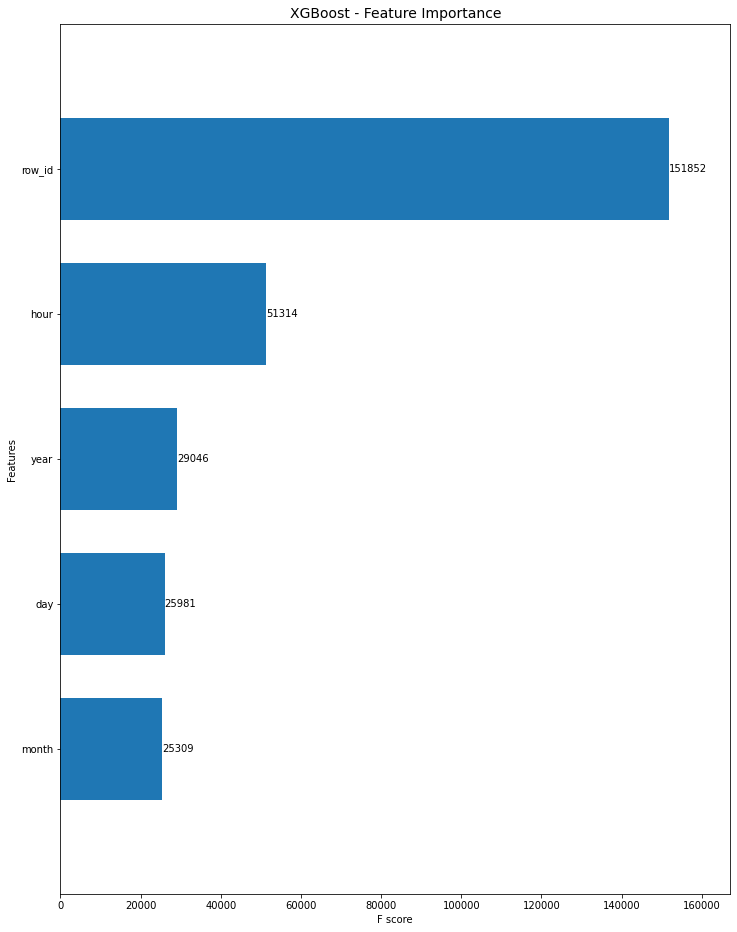

In [ ]:
print('Plotting Feature Importance')
fig, ax = plt.subplots(figsize=(12,16))
xgb.plot_importance(xgb_model, height=0.7, ax=ax)
ax.grid(False)
plt.title("XGBoost - Feature Importance", fontsize=14)
plt.show()